In [ ]:
#Question1
# K-Nearest Neighbors (KNN) Regression Implementation
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Libraries imported successfully.\n")
# 2. LOAD THE DATASET
path = "/content/drive/MyDrive/ADS/KNN_regression_dataset.xlsx"
df = pd.read_excel(path)
print("Data Loaded Sucessfully")
#DISPLAY SUMMARY STATISTICS
print("Summary Statistics:")
display(df.describe())
# 4. TRAIN-TEST SPLIT (80/20)
print("Splitting dataset into 80% training and 20% testing")

X = df[['FlowRate_LPM', 'InletTemp_C', 'PressureDrop_kPa']]
y = df['Efficiency_%']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train-test split completed successfully.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}\n")
# 5. STANDARDIZE FEATURES
print("Scaling/standardizing input features")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully")
# 6. BUILD KNN REGRESSION MODEL (k = 5)
print("Training KNN Regression model with k = 5")

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


print("KNN model training completed successfully")
# 7. PREDICT ON TEST SET
print("Generating predictions on the test set")

y_pred = knn.predict(X_test_scaled)
print(y_pred)

print("Prediction completed successfully")
# 8. EVALUATION METRICS
print("Calculating evaluation metrics")

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("======= MODEL EVALUATION RESULTS =======")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print("Evaluation metrics calculated successfully")


Libraries imported successfully.

Data Loaded Sucessfully
Summary Statistics:


,FlowRate_LPM,InletTemp_C,PressureDrop_kPa,Efficiency_%
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.412309,50.421038,2.760826,17.582045
std,2.629236,17.531394,1.308034,6.574029
min,1.041688,20.193096,0.500052,0.572450
25%,3.123759,34.464456,1.676079,12.967408
50%,5.471266,51.124034,2.752763,17.834897
75%,7.698876,65.627903,3.915966,22.455350
max,9.997459,79.964824,4.990194,34.491278


Splitting dataset into 80% training and 20% testing
Train-test split completed successfully.
Training samples: 800
Testing samples: 200

Scaling/standardizing input features
Feature scaling completed successfully
Training KNN Regression model with k = 5
KNN model training completed successfully
Generating predictions on the test set
[19.1733342  15.13746261 17.37842408 13.16854619 12.60638194 15.64227166
  7.04379573 11.82742047 23.55284685 22.33910876 25.9677714  20.1958975
 14.08019395 15.61871663 17.83453237 24.23369271 21.61423179 23.69844972
 19.82500768  8.0573018  24.22483922 20.62416142 14.485503    7.3031033
 17.12364863 19.35578063 24.51233621 25.38923209 21.63092537 12.62294433
 19.0701117  18.92812847  7.56972567 24.27481058 25.18124343 23.10617471
 13.19684183 25.01614925 11.52934636 14.01214348 15.53742812  8.89142909
 19.61855772 17.06046553 21.63101346 24.51233621 17.37842408 11.82768848
 21.46334685  9.86347442 15.51053673 19.67159894 22.03956215 15.44617514
 19.531207

Libraries Imported Successfully
   FlowRate_LPM  InletTemp_C  PressureDrop_kPa  Efficiency_%
0      4.370861    31.107976          1.677676      8.153855
1      9.556429    52.514057          1.611405     19.832165
2      7.587945    72.376750          4.578146     30.023816
3      6.387926    63.933493          1.622958     19.201464
4      2.404168    68.393669          1.723774     26.920821
Data Loaded Successfully
Spliting Of Data Completed Successfully
k = 1 corresponding R² Score Value = 0.8055
k = 3 corresponding R² Score Value = 0.8257
k = 5 corresponding R² Score Value = 0.8285
k = 10 corresponding R² Score Value = 0.8472


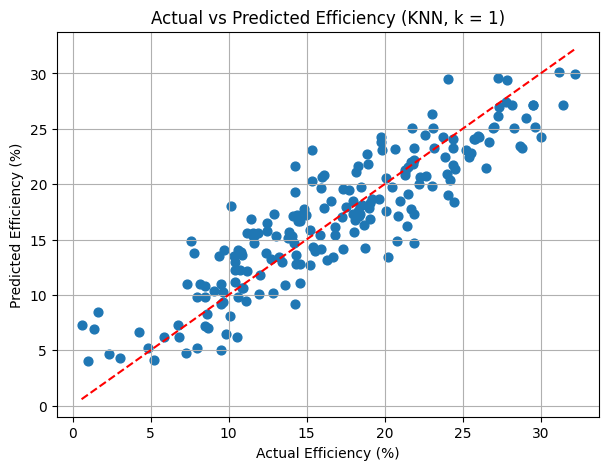

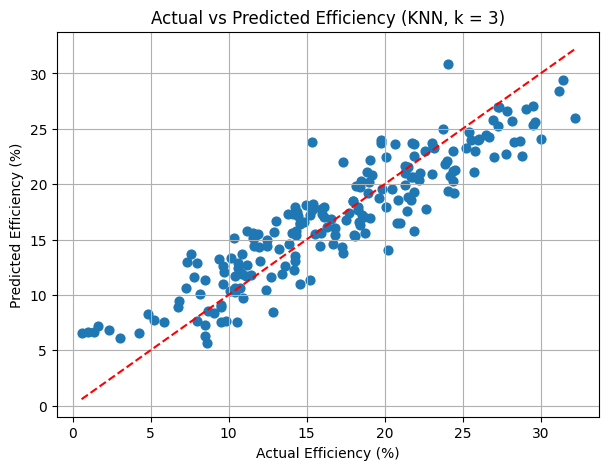

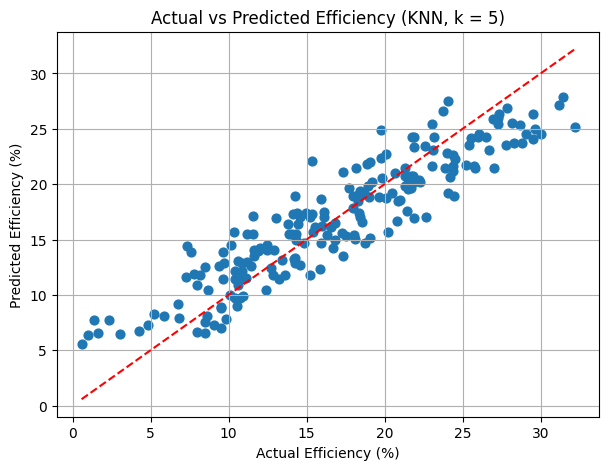

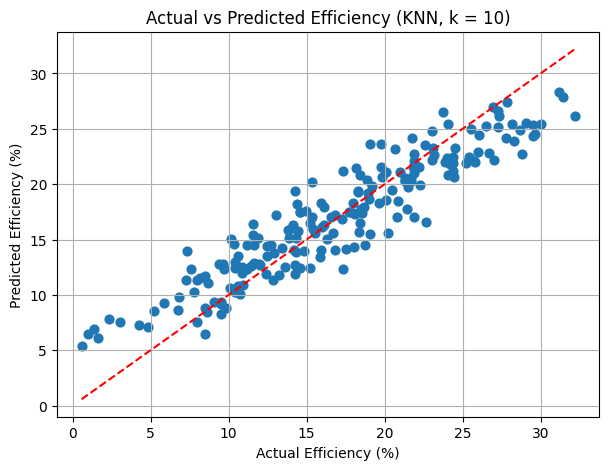

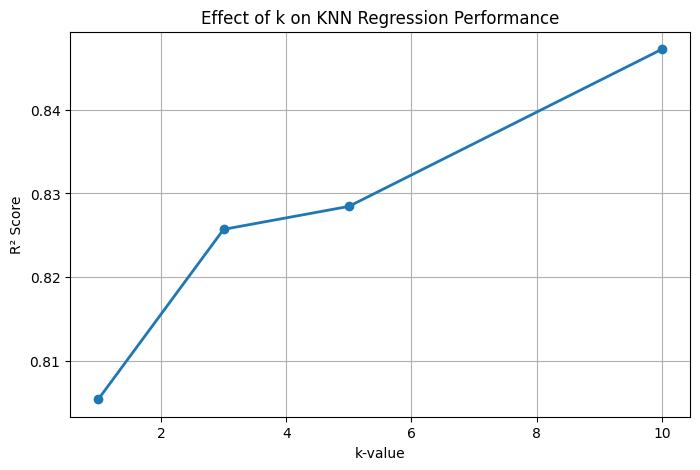

Best k-value: 10
Best R² Score: 0.8472


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
print("Libraries Imported Successfully")

# Load Dataset
path = "/content/drive/MyDrive/ADS/KNN_regression_dataset.xlsx"
df = pd.read_excel(path)
print(df.head(5))
print("Data Loaded Successfully")

# Split Dataset
X = df[['FlowRate_LPM', 'InletTemp_C', 'PressureDrop_kPa']]
y = df['Efficiency_%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Spliting Of Data Completed Successfully")

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate different k-values
k_values = [1, 3, 5, 10]
r2_scores = []
predictions = {}       # Store predictions for graphs

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    predictions[k] = y_pred    # store for plotting later

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"k = {k} corresponding R² Score Value = {r2:.4f}")

#  Graph for every K model

for k in k_values:
    plt.figure(figsize=(7,5))
    plt.scatter(y_test, predictions[k], s=40)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--')
    plt.title(f"Actual vs Predicted Efficiency (KNN, k = {k})")
    plt.xlabel("Actual Efficiency (%)")
    plt.ylabel("Predicted Efficiency (%)")
    plt.grid(True)
    plt.show()

# Plot k vs R² Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, r2_scores, marker='o', linewidth=2)
plt.title("Effect of k on KNN Regression Performance")
plt.xlabel("k-value")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

# Identify best k
best_k = k_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

print("===============================")
print(f"Best k-value: {best_k}")
print(f"Best R² Score: {best_r2:.4f}")
